# Clustering ATMs

In this notebook, I will pick n atm ids (n=50) and generate a dataset for clustering.

In [13]:
import matplotlib.pyplot as plt

sys.path.append(r'../atm_demand')
from feature_generation import *
from models import *

import pandas as pd
import tensorflow as tf
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../atm_demand/DATA_sample_atm.csv")

In [3]:
df['AtmId'].value_counts()[:50].index

Int64Index([ 26637,  27687,  27663,  33817,  33821,  27651,  32785,  33793,
             33795,  33796, 119852,  33800,  27664,  27667,  33807,  33850,
             33774,  33852,  27711,  33827,  33828,  33830,  27707,  33831,
             33833,  27727,  27723,  33879,  27714,  33862,  33809,  33771,
             27729,  27570,  27537,  33677,  27539,  33679,  33713,  33714,
             27556,  33724,  33726,  27579,  33707,  27568,  33711, 119801,
             33766,  33750],
           dtype='int64')

## Generating Datasets with Data of All ATMs

In [4]:
CLUSTER_WITH = 'CashIn'

clustering_df = pd.DataFrame(dtype='float64')
feature_sets = []
atmIds = df['AtmId'].value_counts()[:50].index


for atmId in atmIds:
    atm_df = get_atm(df, atmId)
    atm_df = atm_df[:-135]
    atm_df = clean_data(atm_df, drop_zeros=True)
    for target in ['CashIn', 'CashOut']:
        atm_df[target] = np.log(atm_df[target] + 1e-6)

    day_of_the_week_index = get_day_of_the_week_index(atm_df.index)

    for i in range(7):
        clustering_df.loc[atmId, i] = atm_df.loc[day_of_the_week_index[day_of_the_week_index == i].index].mean()[CLUSTER_WITH]

    atm_df['AtmId'] = atmId
    feature_set = get_feature_sets(atm_df, ['CashIn', 'CashOut'])
    feature_sets.append(feature_set)

all_atms_feature_set = pd.concat(feature_sets, axis=0)

## Applying Kmeans and Updating the Dataset

In [5]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(softmax(clustering_df.to_numpy(), axis = 1))

d = {atmId:label for atmId, label in zip(atmIds, kmeans.labels_)}

all_atms_feature_set['ClusterId'] = all_atms_feature_set['AtmId'].map(d)
all_atms_feature_set.drop(columns = 'AtmId', inplace = True)
all_atms_feature_set.sort_index(inplace = True)
all_atms_feature_set

,CashIn,CashOut,CashIn_average_7,CashIn_average_30,CashOut_average_7,CashOut_average_30,CashIn_trend_7,CashOut_trend_7,CashIn_t-1,CashIn_t-2,...,ramazan_in_7_days,is_kurban,kurban_in_7_days,is_cocuk_bayrami,is_isci_bayrami,is_spor_bayrami,is_zafer_bayrami,is_cumhuriyet_bayrami,Special_Dates_Index,ClusterId
HistoryDate,,,,,,,,,,,,,,,,,,,,,
2016-02-10,10.920890,10.504519,10.822261,10.744681,10.767122,10.575975,11.754570,11.104149,10.746347,11.562477,...,0,0,0,0,0,0,0,0,0,0
2016-02-10,9.615805,10.892099,10.043585,9.884044,10.501516,10.164217,12.084841,10.412103,9.994698,10.658670,...,0,0,0,0,0,0,0,0,0,5
2016-02-10,10.949929,10.833484,10.728263,10.758337,10.669490,10.392263,11.263721,10.328124,11.009572,10.862263,...,0,0,0,0,0,0,0,0,0,2
2016-02-10,10.020826,9.835744,9.596256,9.553482,10.074833,9.753501,10.513635,10.124608,9.906981,10.109281,...,0,0,0,0,0,0,0,0,0,4
2016-02-10,10.395130,10.850501,10.234860,10.255824,10.319790,10.024174,8.954794,10.402511,10.256255,10.672669,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-22,10.779477,11.000432,10.884625,10.794017,11.168857,11.154624,10.501417,10.946539,11.105108,11.060054,...,0,0,0,0,0,0,0,0,0,6
2020-01-22,11.169026,10.521372,11.140228,11.096149,10.785625,10.623846,11.616918,11.029034,11.183101,11.454820,...,0,0,0,0,0,0,0,0,0,3
2020-01-22,11.409618,11.050572,11.370950,11.450794,11.050481,11.185286,12.451570,11.123545,11.218554,11.690486,...,0,0,0,0,0,0,0,0,0,6


## Aranging Data for Model Training

In [6]:
all_atms_feature_set.columns

Index(['CashIn', 'CashOut', 'CashIn_average_7', 'CashIn_average_30',
       'CashOut_average_7', 'CashOut_average_30', 'CashIn_trend_7',
       'CashOut_trend_7', 'CashIn_t-1', 'CashIn_t-2', 'CashIn_t-3',
       'CashIn_t-4', 'CashIn_t-5', 'CashIn_t-6', 'CashIn_t-7', 'CashIn_t-8',
       'CashIn_t-9', 'CashIn_t-10', 'CashIn_t-11', 'CashIn_t-12',
       'CashIn_t-13', 'CashIn_t-14', 'CashOut_t-1', 'CashOut_t-2',
       'CashOut_t-3', 'CashOut_t-4', 'CashOut_t-5', 'CashOut_t-6',
       'CashOut_t-7', 'CashOut_t-8', 'CashOut_t-9', 'CashOut_t-10',
       'CashOut_t-11', 'CashOut_t-12', 'CashOut_t-13', 'CashOut_t-14',
       'CashOut_t-15', 'CashOut_t-16', 'CashOut_t-17', 'CashOut_t-18',
       'CashOut_t-19', 'CashOut_t-20', 'CashOut_t-21', 'CashOut_t-22',
       'CashOut_t-23', 'CashOut_t-24', 'CashOut_t-25', 'CashOut_t-26',
       'CashOut_t-27', 'CashOut_t-28', 'CashOut_t-29', 'CashOut_t-30',
       'CashOut_t-31', 'CashOut_t-32', 'CashOut_t-33', 'CashOut_t-34',
       'CashOut_t-35', '

In [7]:
categorical_features = ['Day_of_the_Week_Index', 'Day_of_the_Month_Index',
       'Week_of_the_Year_Index', 'Is_Weekday', 'Special_Dates_Index',
       'is_cocuk_bayrami', 'is_isci_bayrami', 'is_spor_bayrami',
       'is_zafer_bayrami', 'is_cumhuriyet_bayrami', 'ClusterId']
continuous_features   = ['CashIn_average_7', 'CashIn_average_30',
       'CashOut_average_7', 'CashOut_average_30', 'CashIn_trend_7',
       'CashOut_trend_7', 'CashIn_t-1', 'CashIn_t-2', 'CashIn_t-3',
       'CashIn_t-4', 'CashIn_t-5', 'CashIn_t-6', 'CashIn_t-7', 'CashIn_t-8',
       'CashIn_t-9', 'CashIn_t-10', 'CashIn_t-11', 'CashIn_t-12',
       'CashIn_t-13', 'CashIn_t-14', 'CashOut_t-1', 'CashOut_t-2',
       'CashOut_t-3', 'CashOut_t-4', 'CashOut_t-5', 'CashOut_t-6',
       'CashOut_t-7', 'CashOut_t-8', 'CashOut_t-9', 'CashOut_t-10',
       'CashOut_t-11', 'CashOut_t-12', 'CashOut_t-13', 'CashOut_t-14',
       'CashOut_t-15', 'CashOut_t-16', 'CashOut_t-17', 'CashOut_t-18',
       'CashOut_t-19', 'CashOut_t-20', 'CashOut_t-21', 'CashOut_t-22',
       'CashOut_t-23', 'CashOut_t-24', 'CashOut_t-25', 'CashOut_t-26',
       'CashOut_t-27', 'CashOut_t-28', 'CashOut_t-29', 'CashOut_t-30',
       'CashOut_t-31', 'CashOut_t-32', 'CashOut_t-33', 'CashOut_t-34',
       'CashOut_t-35', 'CashOut_t-36', 'CashOut_t-37', 'CashOut_t-38',
       'CashOut_t-39', 'CashOut_t-40']

groups = [continuous_features]
groups.extend(categorical_features)

TARGET = 'CashIn'
X_train, X_test, y_train, y_test = train_test_split(all_atms_feature_set[all_atms_feature_set.columns[2:]], all_atms_feature_set[TARGET], shuffle = False)

train_inputs = get_input_sets(X_train, groups)
test_inputs  = get_input_sets(X_test, groups)

## Training

In [8]:
tabTransforer = TabTransformer(
    categories = [len(all_atms_feature_set[categorical].unique()) for categorical in categorical_features],
    num_continuous = len(continuous_features),
    dim = 16,
    dim_out = 1,
    depth = 6,
    heads = 8,
    attn_dropout = 0.1,
    ff_dropout = 0.1,
    mlp_hidden = [(64, 'relu'), (16, 'relu')]
)

In [9]:
tabTransforer.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.005),
    loss='mse')

In [10]:
history = tabTransforer.fit(train_inputs, 
            y_train,
            batch_size=1024,
            epochs=20,
            validation_data=(test_inputs, y_test),
            verbose = 1)

Epoch 1/20
53/53 [==============================] - 48s 782ms/step - loss: 13.8591 - val_loss: 0.5912
Epoch 2/20
53/53 [==============================] - 40s 757ms/step - loss: 0.7997 - val_loss: 0.4471
Epoch 3/20
53/53 [==============================] - 41s 768ms/step - loss: 0.7324 - val_loss: 0.4573
Epoch 4/20
53/53 [==============================] - 40s 765ms/step - loss: 0.6947 - val_loss: 0.5153
Epoch 5/20
53/53 [==============================] - 40s 758ms/step - loss: 0.6926 - val_loss: 0.4776
Epoch 6/20
53/53 [==============================] - 40s 757ms/step - loss: 0.6682 - val_loss: 0.5291
Epoch 7/20
53/53 [==============================] - 40s 757ms/step - loss: 0.6580 - val_loss: 0.4997
Epoch 8/20
53/53 [==============================] - 40s 755ms/step - loss: 0.6783 - val_loss: 0.4461
Epoch 9/20
53/53 [==============================] - 40s 757ms/step - loss: 0.6666 - val_loss: 0.4459
Epoch 10/20
53/53 [==============================] - 40s 756ms/step - loss: 0.6573 - val_l

In [11]:
def plot_history(history):
    plt.figure(figsize=(10,4))
    for key in history.history:
        plt.plot(history.history[key][:], label = key)
    plt.legend()
    plt.show()

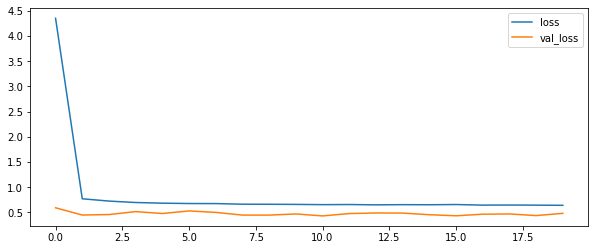

In [14]:
plot_history(history)